In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import joblib
import pickle

In [2]:
# Load the data
url = 'https://raw.githubusercontent.com/manova01/insured_project/main/insurance%20data.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,45.0,male,28.700,2.0,no,32993.77432,16.0,902022.0,8.640895e+06,1.0,9.436591e+07,southwest,8027.96800
1,64.0,male,34.500,0.0,no,38448.37757,8.0,956604.0,1.102239e+07,1.0,2.300219e+08,southwest,13822.80300
2,19.0,female,32.110,0.0,no,50778.14448,15.0,758688.0,1.642626e+06,0.0,4.644349e+07,northwest,2130.67590
3,36.0,male,28.880,3.0,no,33741.00388,10.0,879560.0,1.985637e+06,1.0,1.306169e+08,northeast,6748.59120
4,19.0,female,24.605,1.0,no,12198.20493,16.0,793026.0,1.000938e+07,1.0,6.113392e+07,northwest,2709.24395


In [4]:
df.dtypes

age                                float64
sex                                 object
bmi                                float64
children                           float64
smoker                              object
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                              object
charges                            float64
dtype: object

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [6]:
# Display data types and unique values
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[45. 64. 19. 36. 34.]
47

sex
['male' 'female']
2

bmi
[28.7   34.5   32.11  28.88  24.605]
547

children
[2. 0. 3. 1. 4.]
6

smoker
['no' 'yes']
2

claim_amount
[32993.77432 38448.37757 50778.14448 33741.00388 12198.20493]
1320

past_consultations
[16.  8. 15. 10.  5.]
39

num_of_steps
[902022. 956604. 758688. 879560. 793026.]
1331

hospital_expenditure
[ 8640894.651 11022389.35   1642625.799  1985637.35  10009376.86 ]
1330

number_of_past_hospitalizations
[ 1.  0.  2.  3. nan]
4

anual_salary
[9.43659142e+07 2.30021899e+08 4.64434948e+07 1.30616936e+08
 6.11339168e+07]
1328

region
['southwest' 'northwest' 'northeast' 'southeast']
4

charges
[ 8027.968   13822.803    2130.6759   6748.5912   2709.24395]
1333



In [7]:
# Identify object type columns
strings = list(df.dtypes[df.dtypes=='object'].index)


# EDA


In [8]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              9935 non-null   float64
 1   sex                              10008 non-null  object 
 2   bmi                              9984 non-null   float64
 3   children                         9963 non-null   float64
 4   smoker                           10008 non-null  object 
 5   claim_amount                     9909 non-null   float64
 6   past_consultations               9957 non-null   float64
 7   num_of_steps                     9984 non-null   float64
 8   hospital_expenditure             9978 non-null   float64
 9   number_of_past_hospitalizations  9998 non-null   float64
 10  anual_salary                     9971 non-null   float64
 11  region                           10008 non-null  object 
 12  charges           

In [9]:
print(df.describe())

               age          bmi     children  claim_amount  \
count  9935.000000  9984.000000  9963.000000   9909.000000   
mean     39.002416    30.435221     1.062632  32220.875871   
std      13.948819     6.112510     1.190579  15079.404127   
min      18.000000    15.960000     0.000000   1920.136268   
25%      26.000000    26.125000     0.000000  19540.950640   
50%      39.000000    30.030000     1.000000  32800.380850   
75%      51.000000    34.320000     2.000000  44147.667580   
max      64.000000    53.130000     5.000000  77277.988480   

       past_consultations  num_of_steps  hospital_expenditure  \
count         9957.000000  9.984000e+03          9.978000e+03   
mean            14.416089  8.968627e+05          1.119890e+07   
std              6.895835  8.472179e+04          1.907507e+07   
min              1.000000  6.954300e+05          2.945253e+04   
25%              9.000000  8.419020e+05          3.776053e+06   
50%             14.000000  9.037690e+05          6.

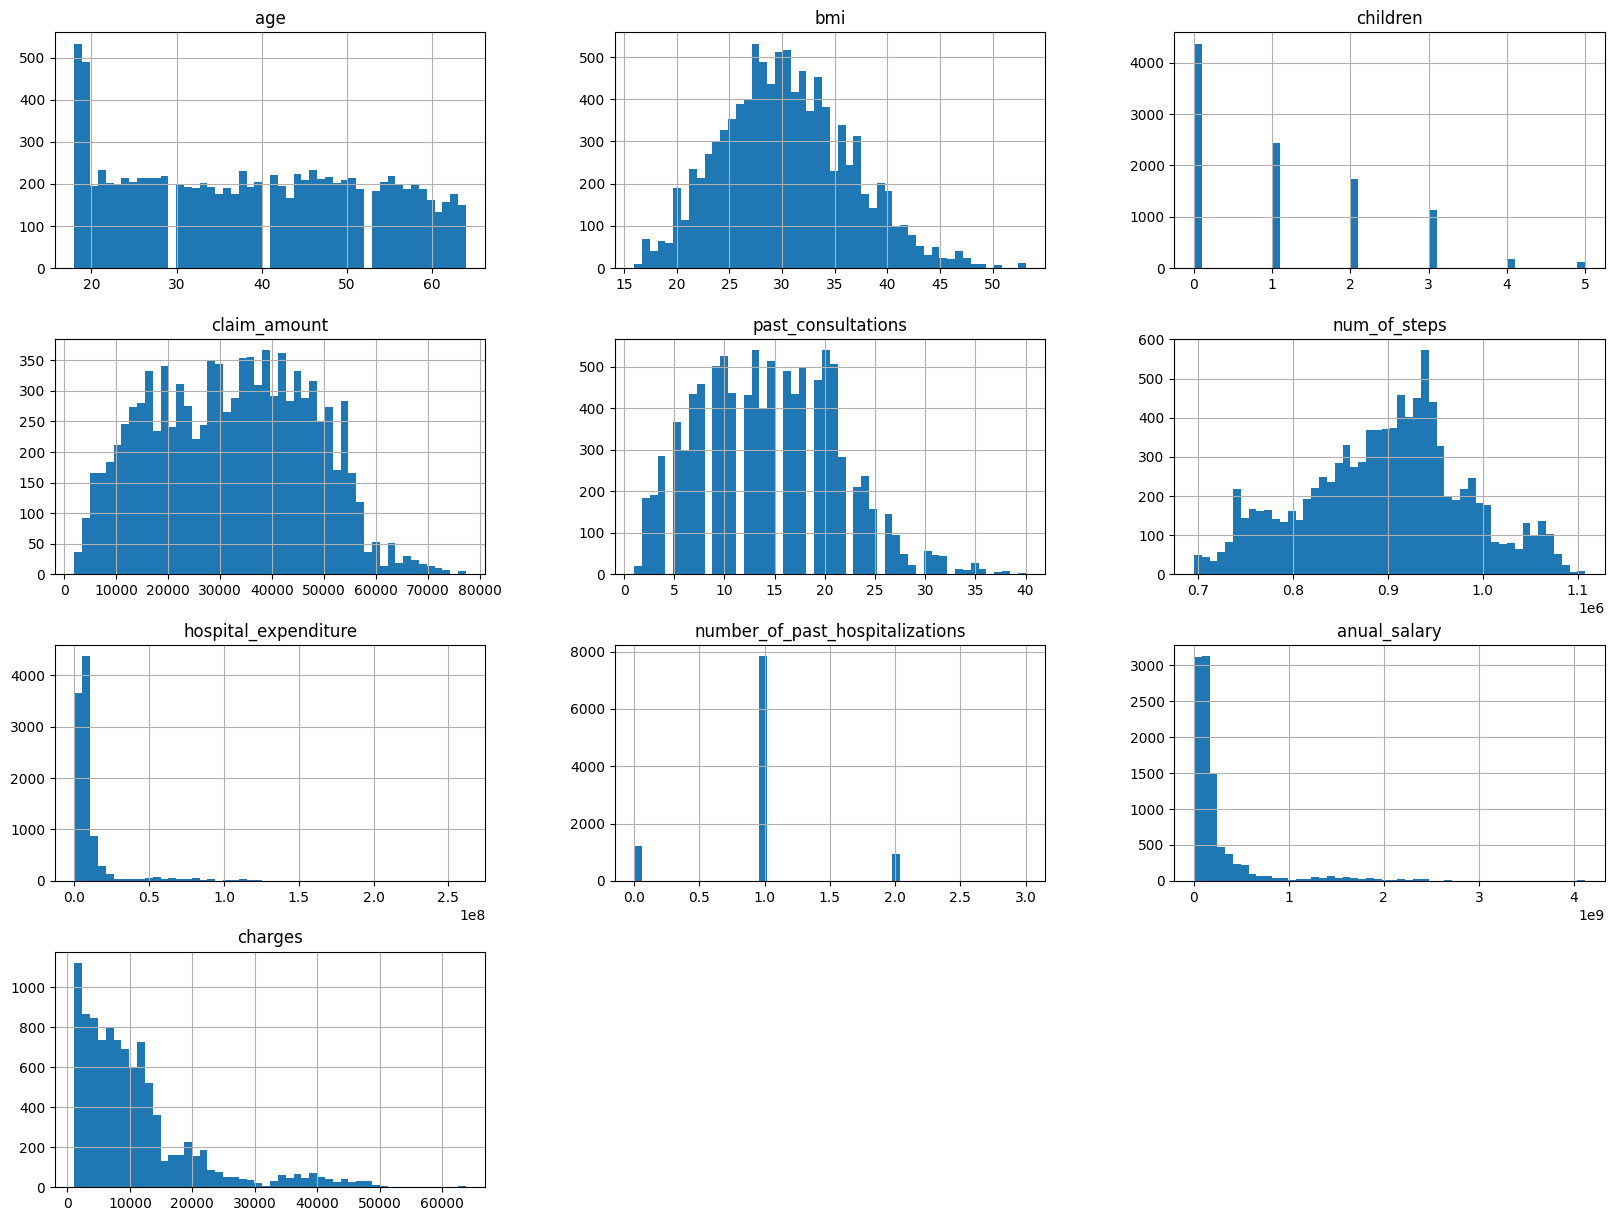

In [10]:
# Histograms
df.hist(bins=50, figsize=(20, 15))
plt.show()

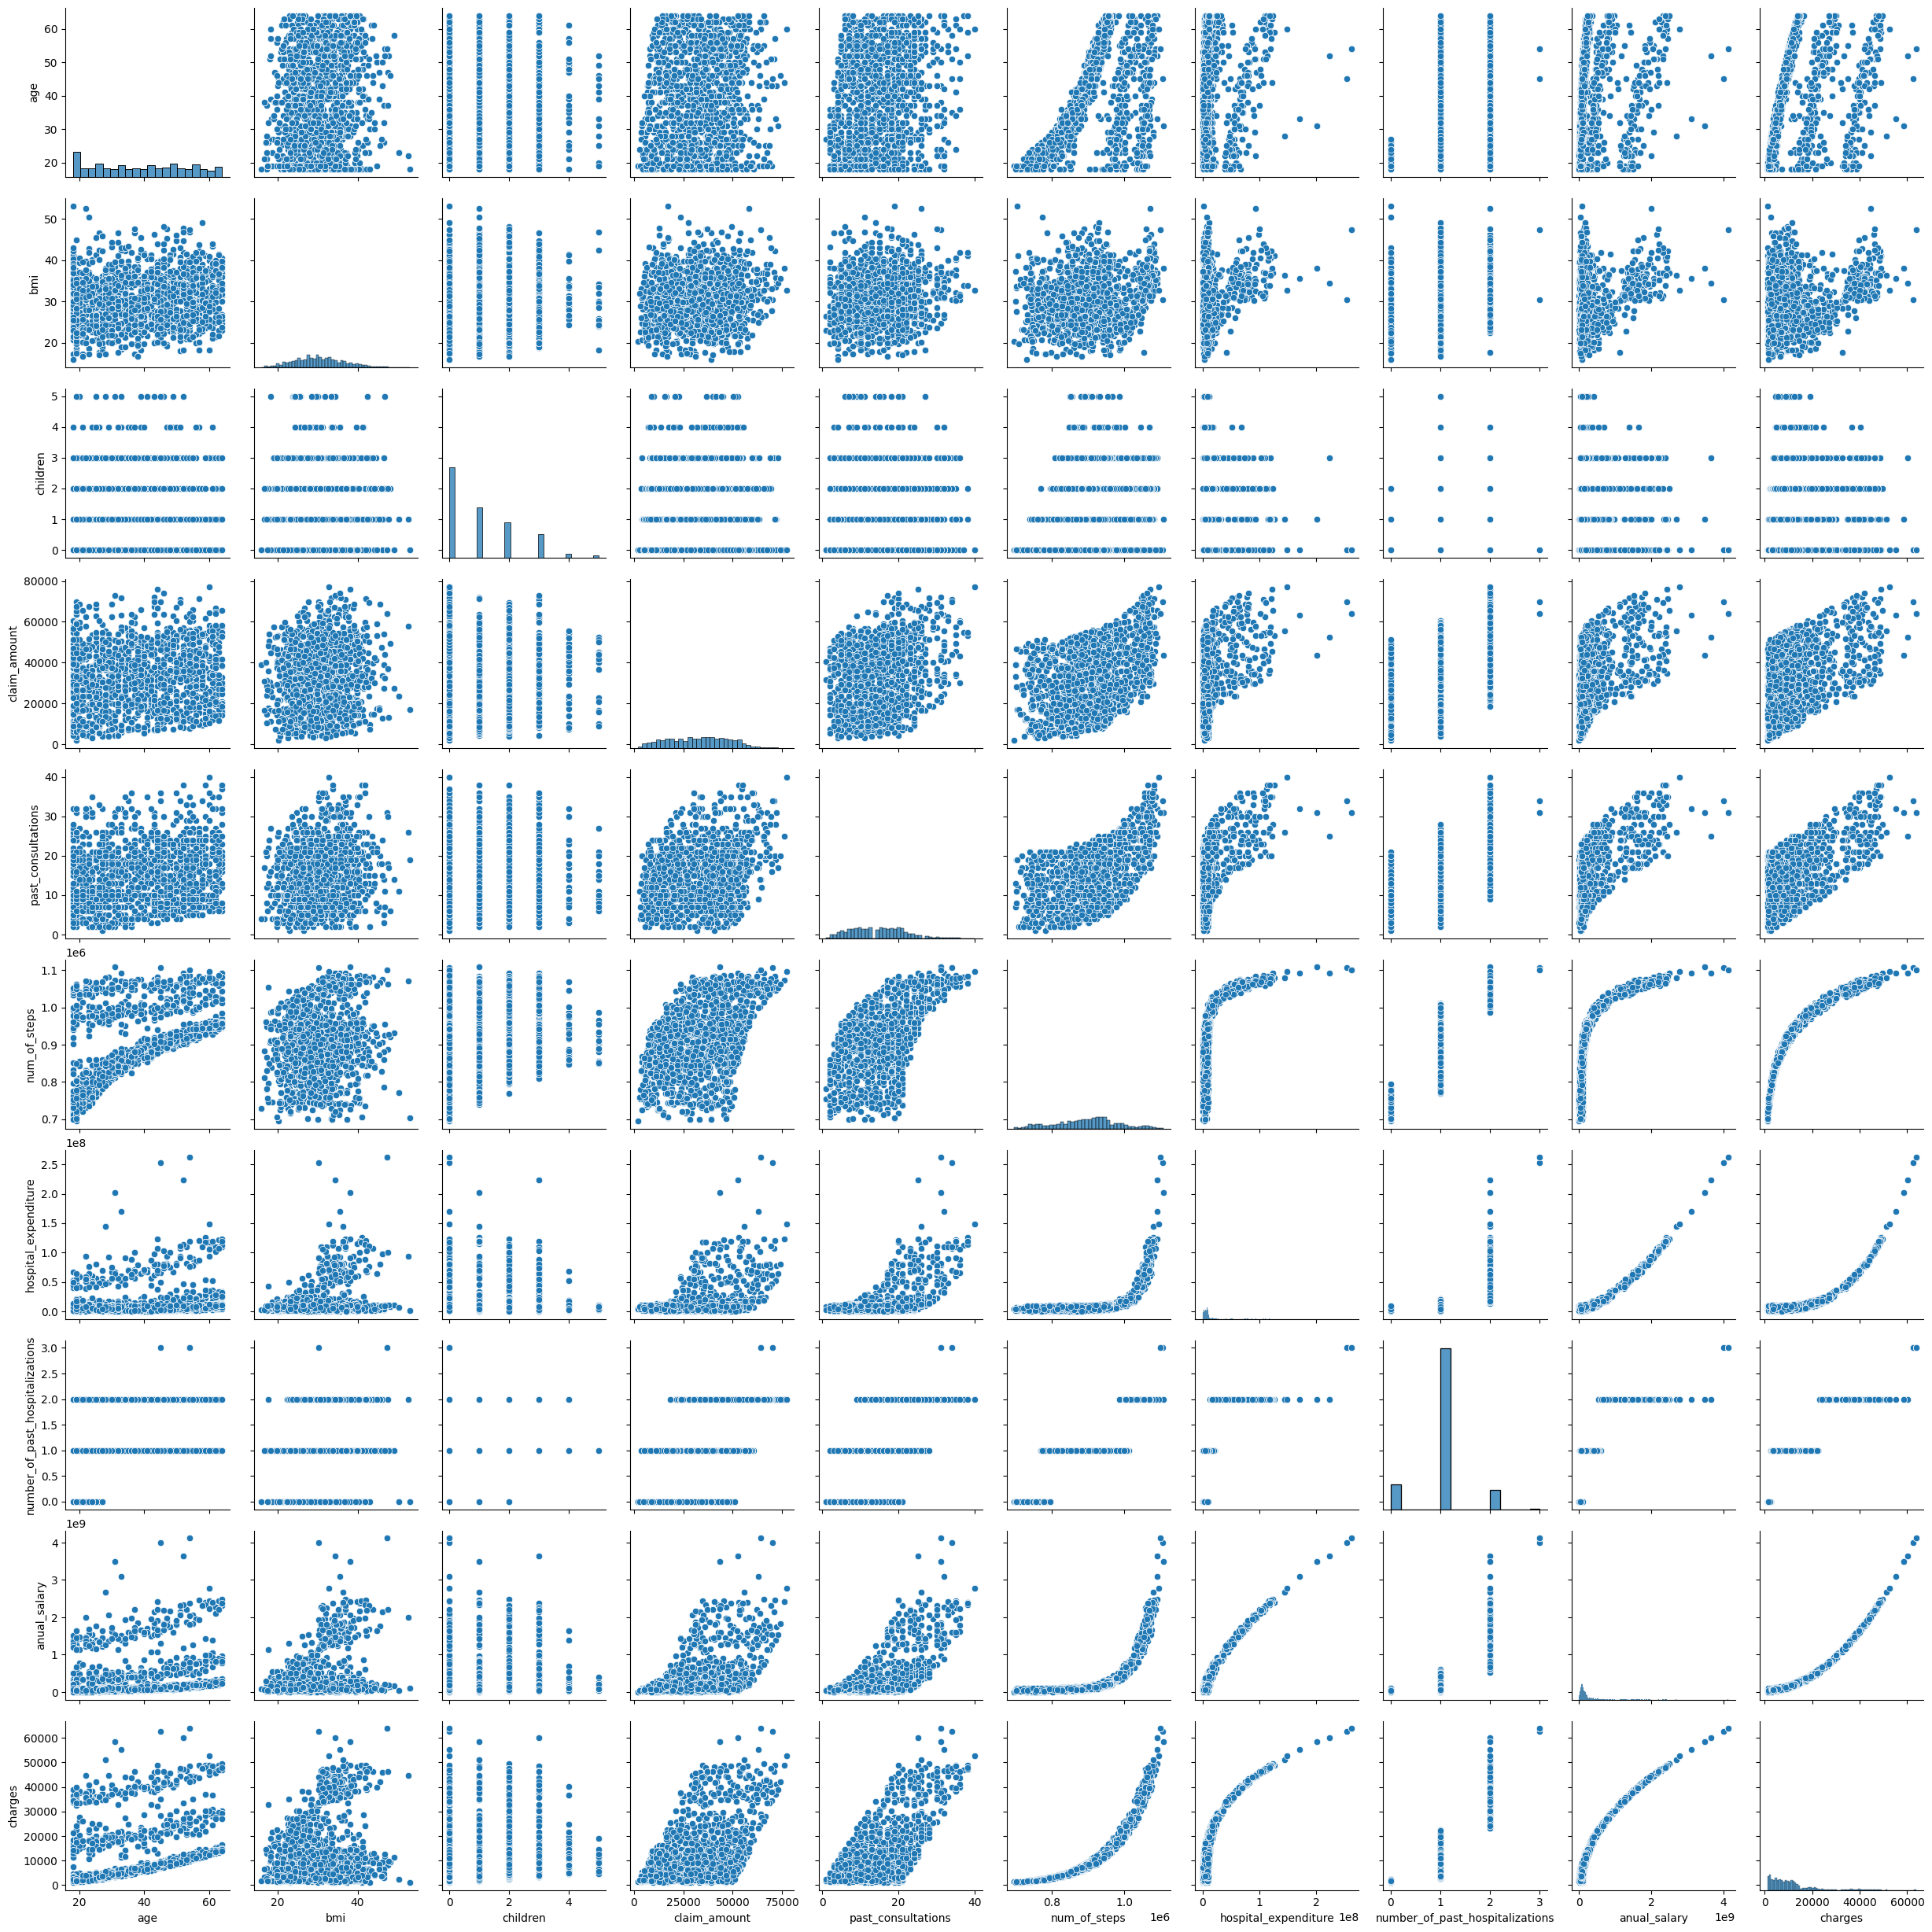

In [11]:
# Pairplot
sns.pairplot(df)
plt.show()


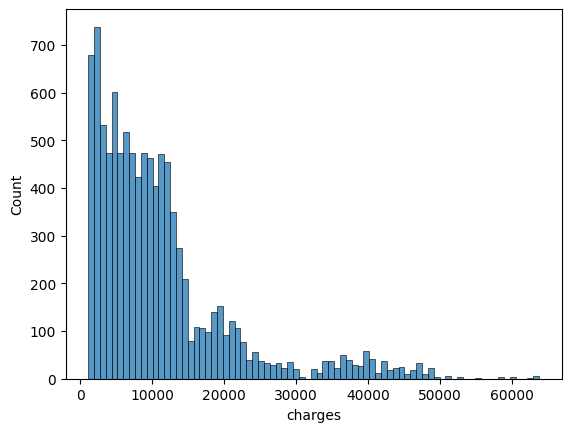

In [12]:
# Plot charges
sns.histplot(df.charges)
plt.show()

In [13]:
# Check for null values
print(df.isnull().sum())


age                                73
sex                                 0
bmi                                24
children                           45
smoker                              0
claim_amount                       99
past_consultations                 51
num_of_steps                       24
hospital_expenditure               30
number_of_past_hospitalizations    10
anual_salary                       37
region                              0
charges                             0
dtype: int64


In [14]:
# Drop rows with null values
df = df.dropna()

In [16]:
# Check for null values again
print(df.isnull().sum())

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
claim_amount                       0
past_consultations                 0
num_of_steps                       0
hospital_expenditure               0
number_of_past_hospitalizations    0
anual_salary                       0
region                             0
charges                            0
dtype: int64


In [17]:
# Split the data into train, validation, and test sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)


In [18]:
# Reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
# Separate target variable
y_train = df_train.charges.values
y_val = df_val.charges.values
y_test = df_test.charges.values


In [20]:
# Remove target variable from feature set
del df_train['charges']
del df_val['charges']
del df_test['charges']


In [21]:
# One Hot Encoding
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [22]:
# Hyperparameter tuning with Ridge regression
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
model = Ridge()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.09716e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07854e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.19825e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.18875e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/codespace/.local/lib/python3.10/si

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_mean_squared_error')

In [23]:
# Best model from GridSearchCV
best_model = grid_search.best_estimator_

In [24]:
# Evaluate the model
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 1007863.3073493572
Root Mean Squared Error: 1003.9239549634012


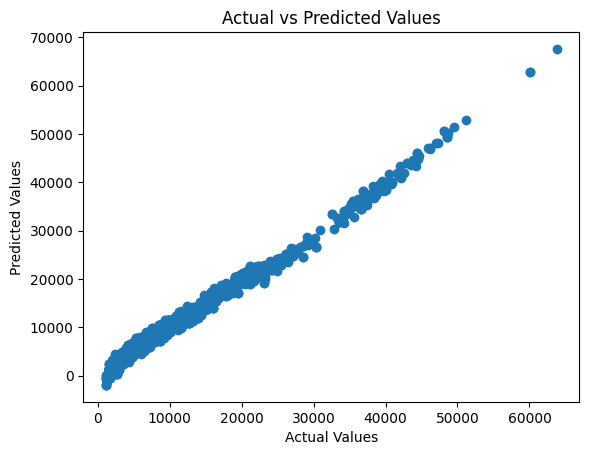

In [25]:
# Scatter plot of actual vs predicted values
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

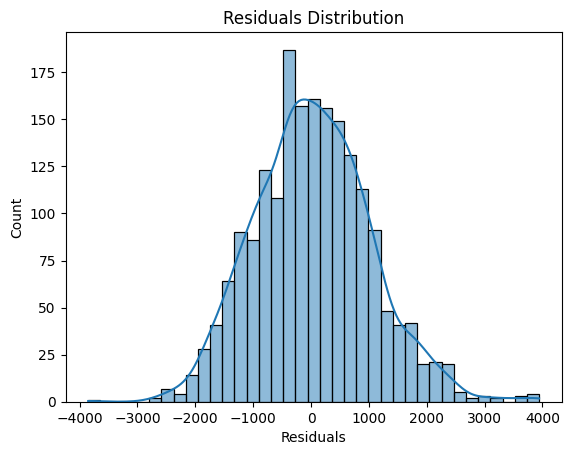

In [26]:
# Residual plot
residuals = y_val - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()


In [27]:

# Save the model using joblib
joblib.dump(best_model, "ridge_model.pkl")

['ridge_model.pkl']

In [28]:
# Save the model using pickle
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)